In [1]:
import time
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from pageRank import *
from os import listdir
from os.path import isfile, join

In [3]:
edges, names = readData("./data/wiki-Vote.txt", "SNAP")
adj = createAdjMatrix(edges,names)
adj = fixSinkNodes(adj)    
adj = scaleAdjMatrix(adj)
p, numiters = iteratePageRank(adj)
printResults(p, names, n=50)

      actor    pagerank
--  -------  ----------
 0     2625  0.00913368
 1     2470  0.00702433
 2     7553  0.0060355
 3     1186  0.0056651
 4     7620  0.00537428
 5     5412  0.00533591
 6     7632  0.00530533
 7     4875  0.0052122
 8     6832  0.00491766
 9     2066  0.00477141
10     8293  0.00474563
11      214  0.00459574
12     4735  0.00450371
13      271  0.00369063
14     5210  0.00356158
15     8163  0.00350675
16     1842  0.00343728
17     1026  0.00326302
18     3537  0.00318332
19     3117  0.00318138
20     2643  0.00311999
21      299  0.00307235
22     7699  0.00296291
23     3755  0.00295299
24     5459  0.00291944
25     1633  0.00282958
26     7890  0.00282107
27     4256  0.00281394
28     1726  0.00277207
29     4247  0.00268769
30     8294  0.00253837
31     4402  0.00252786
32     3408  0.00252407
33     7809  0.00249076
34     5288  0.0024268
35     7961  0.00235938
36     3650  0.00228157
37     1412  0.00226617
38     7478  0.00225942
39     1956  0.00223

In [ ]:
# for f in files[snapMask]:
#     print(f)
#     if f == "soc-LiveJournal1.txt":
#         continue
# printResults(dfSnap[dfSnap["name"] == "wiki-Vote.txt"]["ps"].to_numpy()[0], dfSnap[dfSnap["name"] == "wiki-Vote.txt"]["names"].to_numpy()[0], n=50)
len(dfSnap[dfSnap["name"] == "wiki-Vote.txt"]["names"].to_numpy()[0])

In [ ]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Dataset Size")
ax.set_ylabel("Read Time")
ax.set_title("Read Time of SNAP datasets")
x = dfSmall["size"]
y = dfSmall["readtime"]
ax.scatter(x,y)

In [ ]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Dataset Size")
ax.set_ylabel("Read Time")
ax.set_title("Read Time of SNAP datasets")
x = dfSnap["size"]
y = dfSnap["readtime"]
ax.scatter(x,y)

In [ ]:
dfs = pd.concat([dfSmall,dfSnap])

In [ ]:
dfs

In [6]:
files = np.array([f for f in listdir("./data/") if isfile(join("./data/", f))])
snapMask = [re.search("\..*", file).group(0) == '.txt' for file in files] 
np.logical_not(snapMask)

array([False,  True, False,  True,  True,  True, False, False, False])

In [7]:
dataSmall = [] # [name, readtime, processing time, numiters, ps]

for f in files[np.logical_not(snapMask)]:
    newrow = []
    newrow.append(f)
    
    tic = time.process_time()
    edges, names = readData("./data/" + f, "SMALL")
    adj = createAdjMatrix(edges,names)
    adj = fixSinkNodes(adj)    
    adj = scaleAdjMatrix(adj)
    tock = time.process_time()
    newrow.append(len(edges))
    newrow.append(names)
    newrow.append(tock-tic)
    
    tic = time.process_time()
    p, numiters = iteratePageRank(adj)
    tock = time.process_time()
    newrow.append(tock-tic)
    newrow.append(numiters)
    newrow.append(p)
    dataSmall.append(newrow)

In [25]:
dataSnap = [] # [name, readtime, processing time, numiters, ps]

for f in files[snapMask]:
    print(f)
    if f == "soc-LiveJournal1.txt":
        continue
    newrow = []
    newrow.append(f)
    
    tic = time.process_time()
    edges, names = readData("./data/" + f, "SNAP")
    adj = createAdjMatrix(edges,names)
    adj = fixSinkNodes(adj)    
    adj = scaleAdjMatrix(adj)
    tock = time.process_time()
    newrow.append(len(edges))
    newrow.append(names)
    newrow.append(tock-tic)
    
    
    tic = time.process_time()
    p, numiters = iteratePageRank(adj)
    tock = time.process_time()
    newrow.append(tock-tic)
    newrow.append(numiters)
    newrow.append(p)
    dataSnap.append(newrow)

amazon0505.txt
eg.txt
p2p-Gnutella05.txt
soc-LiveJournal1.txt
wiki-Vote.txt


In [26]:
dfSmall = pd.DataFrame(dataSmall, columns = ["name", "size", "names", "readtime", "processtime", "numiters", "ps"])
dfSnap = pd.DataFrame(dataSnap, columns = ["name", "size", "names", "readtime", "processtime", "numiters", "ps"])

In [ ]:
dfSmall["ps"]

In [ ]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Dataset Size (bytes)")
ax.set_ylabel("Read/process Time (s)")
ax.set_title("Timing of SMALL and SNAP datasets")
ax.set_xscale("log")
ax.set_yscale("log")
pt = dfs["processtime"]
rt = dfs["readtime"]
numiters = dfs["numiters"]
size = dfs["size"]
ax.scatter(size,pt, label="process time")
ax.scatter(size,rt, label="read time")
ax.legend()

In [40]:
dfSnap

,name,size,names,readtime,processtime,numiters,ps
0,amazon0505.txt,3356824,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",17.921875,2.000000,24,"[4.907962291929505e-07, 4.907962291929505e-07,..."
1,eg.txt,5,"[0, 1, 2, 3]",0.015625,0.000000,18,"[0.07113425097882939, 0.09796411333200498, 0.7..."
2,p2p-Gnutella05.txt,31839,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.140625,0.015625,7,"[2.5881694211390537e-05, 4.0650580837822784e-0..."
3,wiki-Vote.txt,103689,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",0.484375,0.031250,14,"[8.492172101668637e-05, 2.108222066057625e-05,..."


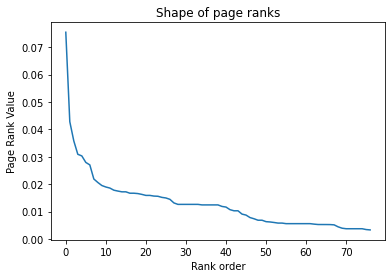

In [39]:
ps=dfSmall.iloc[2]["ps"][:100]
fig, ax = plt.subplots(1)
ax.set_xlabel("Rank order")
ax.set_ylabel("Page Rank Value")
ax.set_title("Shape of page ranks")
ax.plot([i for i in range(len(ps))],sorted(ps)[::-1])
